# Começando


In [8]:
import matplotlib.pyplot as plt
import pandas as pd 
import math
import numpy as np

## Pegando dados

In [16]:
dados_csv = pd.read_csv("population_by_country_2020.csv")
x1_csv, x2_csv, y_csv = dados_csv["Population (2020)"], dados_csv["Density (P/Km²)"], dados_csv["Land Area (Km²)"]

x1, x2, y = [], [], []

for i in range(x1_csv.shape[0]):
    x1.append(x1_csv[i])
    x2.append(x2_csv[i])
    y.append(y_csv[i])

# 1) 

## a)Faça o gráfico de dispersão bidimensional (XY) entre a variável y e cada uma das variáveis
regressoras X1,..., Xp (p gráficos separados)

### Gráfico do Conjunto de Dados X1Y

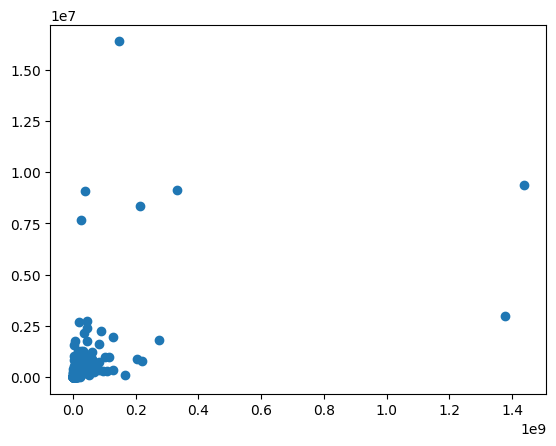

In [22]:
plt.scatter(x1,y)

### Gráfico do Conjunto de Dados X2Y

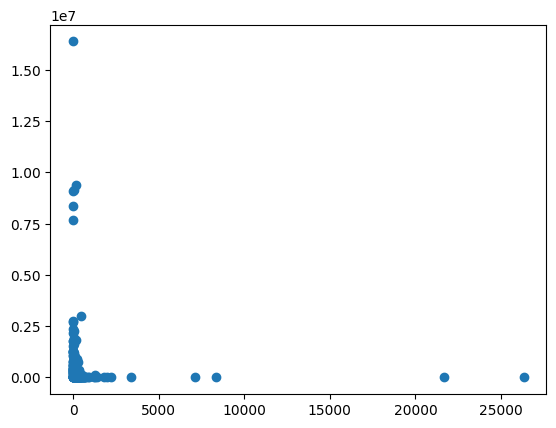

In [23]:
plt.scatter(x2,y)

## b) Estime a correlação entre a variável Y e cada uma das variáveis regressoras (ρ(Y,Xi)). Comente.

### Função de Coeficiente de Correlação

In [28]:
def CoeficienteCorrelacao(x, y):
  Sx = 0
  Sy = 0
  Sxy = 0
  Sxx = 0
  Syy = 0
  x_x_med = []
  y_y_med = []
  xx = []
  yy = []
  xy = []

  for i in range(len(x)):
      Sx += x[i]
      Sy += y[i]
  x_med = Sx/len(x)
  y_med = Sy/len(y)

  for i in range(len(x)):
      x_x_med.append((x[i] - x_med))
      y_y_med.append((y[i] - y_med))

  for i in range(len(x)):
      xx.append(x_x_med[i]**2)
      yy.append(y_y_med[i]**2)
      xy.append(y_y_med[i]*x_x_med[i])

  # Calculo do Rho
  for i in range(len(x)):
      Sxy += xy[i]
      Sxx += xx[i]
      Syy += yy[i]
  
  return { 'rho': Sxy / math.sqrt(Sxx*Syy), 'sxx': Sxx, 'sxy': Sxy, 'xMed': x_med, 'yMed': y_med} # RHO


### Correlação entre X1 e Y

In [35]:
x1_rho = CoeficienteCorrelacao(x1,y)['rho']
print(f"O valor da correlação entre X1 e Y é: {x1_rho}")

O valor da correlação entre X1 e Y é: 0.4557444362371723


Comentário do resultado

### Correlação entre X2 e Y

In [36]:
x2_rho = CoeficienteCorrelacao(x2,y)['rho']
print(f"O valor da correlação entre X1 e Y é: {x2_rho}")

O valor da correlação entre X1 e Y é: -0.058765963020454726


Comentário do resultado

## c) Calcule o coeficiente de determinação R²(Y,Xi) entre a variável Y e cada uma das variáveis regressoras. Comente o resultado.

### Coeficiente de Determinação entre X1 e Y

In [41]:
coefDeterminationX1 = math.pow(x1_rho, 2)
print(f"O valor do coeficiente da determinação entre X1 e Y é: {coefDeterminationX1}")

O valor do coeficiente da determinação entre X1 e Y é: 0.20770299116113802


Comentário do resultado

### Coeficiente de Determinação entre X2 e Y

In [40]:
coefDeterminationX2 = math.pow(x2_rho, 2)
print(f"O valor do coeficiente da determinação entre X1 e Y é: {coefDeterminationX2}")

O valor do coeficiente da determinação entre X1 e Y é: 0.003453438409721452


Comentário do resultado

## d) Encontre o hiperplano de quadrados mínimos (estime β0, β1, ..., βp).

Revisar

### Função para calcular Beta Chápeu

In [51]:
def CalculaBeta(x, y):
  matrix = np.array(x)
  y = np.array(y)

  transposta = np.transpose(matrix)
  mult = np.dot(transposta,matrix)
  inversa = np.linalg.inv(mult)
  mult2 = np.dot(inversa, transposta)

  return np.dot(mult2,y) #Beta

### Valores estimados de Beta Chápeu

In [65]:
base = np.zeros(len(x1))
for i in range(len(base)):
    base[i] = 1

x = []

for i in range(len(x1)):
    x.append([base[i], x1[i], x2[i]])

betas = CalculaBeta(x, y)

print("Os Valores de Beta são:\n")

for beta in betas:
    print(f"\t{beta}", end="")

Os Valores de Beta são:

	381688.0823883051	0.005685266373947229	-34.18806501727914

## e) Calcule os valores estimados de y (ou seja, ŷ) através do hiperplano estimado no item anterior.

## f) Calcule os resíduos, ou seja, o erro de estimação y-ŷ.

## g) Faça o histograma dos erros de estimação encontrados no item anterior. Comente sobre sua característica.